In [298]:
from ambient_api.ambientapi import AmbientAPI
import os, time
import pandas as pd
import numpy as np
import datetime as dt
import dateutil.parser
from matplotlib import pyplot as plt
import act
import xarray as xr

%matplotlib inline

In [301]:
devices = api.get_devices()
device = devices[0]
time.sleep(1)
my_data = devices[0].get_data(end_date = dt.datetime(2020,6,5,0,0))

In [302]:
my_data[-1]

{'dateutc': 1591247100000,
 'tempinf': 81,
 'humidityin': 54,
 'baromrelin': 29.912,
 'baromabsin': 29.046,
 'tempf': 73.4,
 'battout': 1,
 'humidity': 75,
 'winddir': 137,
 'windspeedmph': 0,
 'windgustmph': 0,
 'maxdailygust': 2.2,
 'hourlyrainin': 0,
 'eventrainin': 0,
 'dailyrainin': 0,
 'weeklyrainin': 0,
 'monthlyrainin': 0,
 'totalrainin': 0,
 'solarradiation': 0,
 'uv': 0,
 'feelsLike': 73.97,
 'dewPoint': 64.98,
 'feelsLikein': 82.2,
 'dewPointin': 62.8,
 'loc': 'ambient-prod-2020-23',
 'date': '2020-06-04T05:05:00.000Z'}

In [303]:
dates = np.array([pd.to_datetime(element['date']) for element in my_data])
ordd = dates.argsort()
dates = dates[ordd].astype('datetime64[ns]')


<ipython-input-303-d2020f985a05>:3: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  dates = dates[ordd].astype('datetime64[ns]')


In [304]:
mapn = {'tempinf' : 'inside_temperature',
        'humidityin' : 'inside_humidity',
        'baromrelin' : 'inside_pressure',
        'baromabsin' : 'tba1',
        'tempf' : 'outside_temperature',
        'battout' : 'battery_out',
        'humidity' : 'outside_humidity',
        'winddir' : 'wind_direction',
        'windspeedmph' : 'wind_speed',
        'windgustmph' : 'gust_wind_speed',
        'maxdailygust' : 'maximum_daily_gust',
        'hourlyrainin' : 'hourly_rainfall',
        'eventrainin' : 'tba0',
        'dailyrainin' : 'daily_rainfall',
        'weeklyrainin' : 'weekly_rainfall',
        'monthlyrainin' : 'monthly_rainfall',
        'totalrainin' : 'lifetime_rainfall',
        'solarradiation' : 'downwelling_solar_radiation',
        'uv' : 'uv_index',
        'feelsLike' : 'heat_index_outside',
        'dewPoint' : 'outside_dewpoint',
        'feelsLikein' : 'heat_index_inside',
        'dewPointin' : 'inside_dewpoint'}


dont_care = ['dateutc', 'date', 'loc']
numpy_data = {}
for variable in list(my_data[0].keys()):
    if variable not in dont_care:
        #print(variable)
        this = np.array([element[variable] for element in my_data])[ordd]
        numpy_data.update({mapn[variable] : (['time'], this)})

#outside = np.array([element['tempf'] for element in my_data])[ordd]
#inside = np.array([element['tempinf'] for element in my_data])[ordd]
#outdp = np.array([element['dewPoint'] for element in my_data])[ordd]
#indp = np.array([element['dewPointin'] for element in my_data])[ordd]


In [305]:
tu = 'F'
tsn = 'Temperature'
dpsn = 'Dewpoint'

In [306]:
xds = xr.Dataset(numpy_data,
                coords={'time' : dates })

In [307]:
xds['inside_temperature'].attrs = {'standard_name' : tsn, 'units' : tu, 'long_name' : 'inside_temperature'}
xds['outside_temperature'].attrs = {'standard_name' : tsn, 'units' : tu, 'long_name' : 'outside_temperature'}
xds['outside_dewpoint'].attrs = {'standard_name' : dpsn, 'units' : tu, 'long_name' : 'outside dewpoint'}
xds['inside_dewpoint'].attrs = {'standard_name' : dpsn, 'units' : tu, 'long_name' : 'inside dewpoint'}

xds.attrs['datastream'] = 'Beer And Bike Barn Met Station'



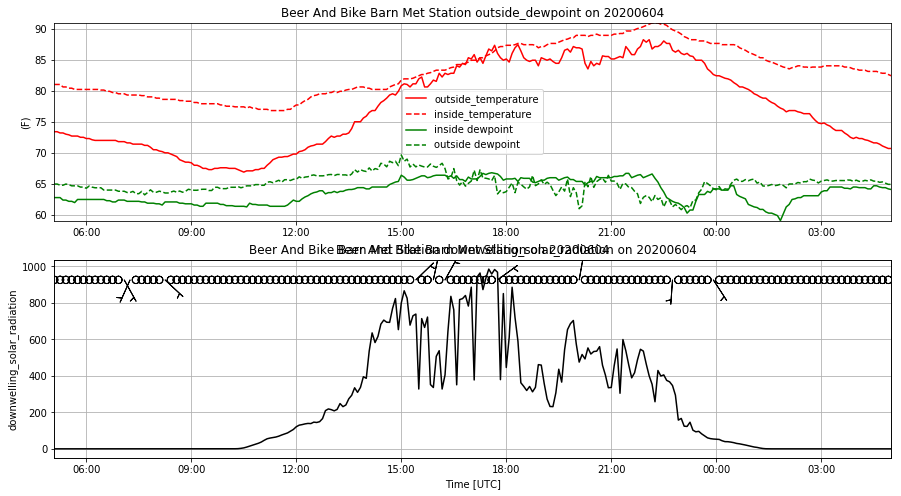

In [308]:
my_disp = act.plotting.TimeSeriesDisplay(
    (xds), figsize=(15, 8), subplot_shape=(2, ))
my_disp.plot('outside_temperature', marker=None, linestyle='-', color='red', 
             label = xds['outside_temperature'].attrs['long_name'], subplot_index=(0, ))
my_disp.plot('inside_temperature',  marker=None, linestyle='--', color='red', 
             label = xds['inside_temperature'].attrs['long_name'], subplot_index=(0, ))
my_disp.plot('inside_dewpoint',  marker=None, linestyle='-', color='green', 
             label = xds['inside_dewpoint'].attrs['long_name'], subplot_index=(0, ))
my_disp.plot('outside_dewpoint', marker=None, linestyle='--', color='green', label = xds['outside_dewpoint'].attrs['long_name'], 
            subplot_index=(0, ))

my_disp.day_night_background('Beer And Bike Barn Met Station')

my_disp.axes[0].grid()
my_disp.axes[0].legend()
my_disp.axes[1].grid()


my_disp.plot('downwelling_solar_radiation',  marker='None', linestyle='-', color='black', label = xds['outside_dewpoint'].attrs['long_name'], 
            subplot_index=(1, ))

my_disp.axes = np.append(my_disp.axes, plt.twinx())
my_disp.xrng = np.append(my_disp.xrng, np.expand_dims(my_disp.xrng[-1,:], axis=0) , axis=0)
my_disp.yrng = np.append(my_disp.yrng, np.expand_dims(my_disp.yrng[-1,:], axis=0) , axis=0)
my_disp.yrng[-1, 0] = .1
my_disp.yrng[-1, 1] = .1

my_disp.plot_barbs_from_spd_dir('wind_direction','wind_speed',subplot_index=(2,), num_barbs_x=180)


#my_disp.plot_barbs_from_u_v(u_field='u', v_field='v', subplot_index=(1, ))
#my_disp.axes[1].set_ylim([0, 2])

In [309]:

xds.inside_dewpoint

<xarray.DataArray 'inside_dewpoint' (time: 288)>
array([62.8, 62.8, 62.8, 62.4, 62.4, 62.2, 62.2, 62. , 62.5, 62.5, 62.5,
       62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.3, 62.3, 62.1, 62.1,
       62.4, 62.4, 62.4, 62.2, 62.2, 62.2, 62.2, 62.2, 62.1, 62.1, 61.9,
       61.9, 61.9, 61.8, 61.8, 61.6, 62.1, 62.1, 62.1, 62.1, 62.1, 61.9,
       61.9, 61.8, 61.8, 61.8, 61.6, 61.6, 61.4, 61.4, 61.9, 61.9, 61.9,
       61.9, 61.9, 61.7, 61.7, 61.5, 61.5, 61.5, 61.4, 61.4, 61.4, 61.4,
       61.3, 61.9, 61.7, 61.7, 61.6, 61.6, 61.6, 61.6, 61.4, 61.4, 61.4,
       61.4, 61.4, 61.4, 61.6, 62. , 62.4, 62.2, 62.2, 62.6, 62.9, 63.1,
       63.4, 63.6, 63.7, 63.9, 63.9, 63.4, 63.6, 63.6, 63.8, 63.6, 63.8,
       63.8, 64. , 64.1, 64.1, 64.2, 64.4, 64.4, 64.4, 64.2, 64.2, 64.5,
       64.5, 64.5, 64.5, 64.5, 64.5, 64.9, 65.1, 65.3, 65.4, 66.4, 66.1,
       65.6, 65.6, 65.7, 65.9, 66.1, 66.3, 66.3, 66. , 66.1, 66.3, 66.4,
       66.4, 66.4, 66.4, 66.1, 66.3, 65.9, 66.3, 65.7, 65.7, 65.4, 66.1,
       65.8, 65.8, 65.8, 66.2, 66.7, 66.5, 66.7, 66.8, 66.7, 66.6, 66.2,
       65.6, 65.8, 65.8, 65.8, 65.9, 65.4, 66. , 65.9, 65.9, 65.9, 65.3,
       65.2, 65.4, 65.6, 65.6, 65.9, 66. , 66. , 66. , 65.6, 65.8, 66. ,
       66.1, 65.7, 65.7, 65.4, 65.4, 65.4, 64.8, 65.2, 65.4, 65.4, 66.2,
       66. , 66. , 66. , 66. , 66. , 66.2, 66.2, 66.3, 66.3, 66.7, 66.7,
       66. , 66.2, 66.4, 66.5, 66. , 66.2, 66.4, 66.6, 65.9, 65.3, 64.4,
       63.7, 62.8, 62.5, 62.2, 62. , 61.9, 61.6, 61.2, 60.3, 60.8, 60.8,
       62.2, 63.3, 63.3, 63.3, 63.8, 63.6, 64.2, 64.2, 64.2, 64. , 64. ,
       64. , 64.7, 64.7, 63.3, 63. , 62.8, 62.6, 61.7, 61.5, 61.3, 61.2,
       60.9, 60.9, 60.5, 60.3, 60.3, 60.1, 59.9, 59.1, 60.2, 61.3, 61.7,
       62.5, 62.6, 62.8, 62.8, 63.1, 63.1, 63.1, 63.1, 63.1, 63.1, 63.7,
       63.9, 63.9, 64.5, 64.5, 64.5, 64.5, 64.5, 64.3, 64.3, 64.2, 64.5,
       64.5, 64.4, 64.4, 64.4, 64.2, 64.2, 64.7, 64.7, 64.5, 64.4, 64.4,
       64.2, 64.1])
Coordinates:
  * time     (time) datetime64[ns] 2020-06-04T05:05:00 ... 2020-06-05T05:00:00
Attributes:
    standard_name:  Dewpoint
    units:          F
    long_name:      inside dewpoint

In [310]:
#dt.datetime(2020,6,5,0,0)
def ingest_ambient_data(api, end_date = None):
    devices = api.get_devices()
    device = devices[0]
    time.sleep(1)
    my_data = devices[0].get_data(end_date = end_date)
    dates = np.array([pd.to_datetime(element['date']) for element in my_data])
    ordd = dates.argsort()
    dates = dates[ordd].astype('datetime64[ns]')
    
    mapn = {'tempinf' : 'inside_temperature',
        'humidityin' : 'inside_humidity',
        'baromrelin' : 'inside_pressure',
        'baromabsin' : 'tba1',
        'tempf' : 'outside_temperature',
        'battout' : 'battery_out',
        'humidity' : 'outside_humidity',
        'winddir' : 'wind_direction',
        'windspeedmph' : 'wind_speed',
        'windgustmph' : 'gust_wind_speed',
        'maxdailygust' : 'maximum_daily_gust',
        'hourlyrainin' : 'hourly_rainfall',
        'eventrainin' : 'tba0',
        'dailyrainin' : 'daily_rainfall',
        'weeklyrainin' : 'weekly_rainfall',
        'monthlyrainin' : 'monthly_rainfall',
        'totalrainin' : 'lifetime_rainfall',
        'solarradiation' : 'downwelling_solar_radiation',
        'uv' : 'uv_index',
        'feelsLike' : 'heat_index_outside',
        'dewPoint' : 'outside_dewpoint',
        'feelsLikein' : 'heat_index_inside',
        'dewPointin' : 'inside_dewpoint'}


    dont_care = ['dateutc', 'date', 'loc']
    numpy_data = {}
    for variable in list(my_data[0].keys()):
        if variable not in dont_care:
            #print(variable)
            this = np.array([element[variable] for element in my_data])[ordd]
            numpy_data.update({mapn[variable] : (['time'], this)})
    
    tu = 'F'
    tsn = 'Temperature'
    dpsn = 'Dewpoint'
    xds = xr.Dataset(numpy_data,
                coords={'time' : dates })
    
    xds['inside_temperature'].attrs = {'standard_name' : tsn, 'units' : tu, 'long_name' : 'inside_temperature'}
    xds['outside_temperature'].attrs = {'standard_name' : tsn, 'units' : tu, 'long_name' : 'outside_temperature'}
    xds['outside_dewpoint'].attrs = {'standard_name' : dpsn, 'units' : tu, 'long_name' : 'outside dewpoint'}
    xds['inside_dewpoint'].attrs = {'standard_name' : dpsn, 'units' : tu, 'long_name' : 'inside dewpoint'}
    xds.attrs['datastream'] = 'Beer And Bike Barn Met Station'
    
    return xds



<ipython-input-310-3274f87186bd>:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  dates = dates[ordd].astype('datetime64[ns]')


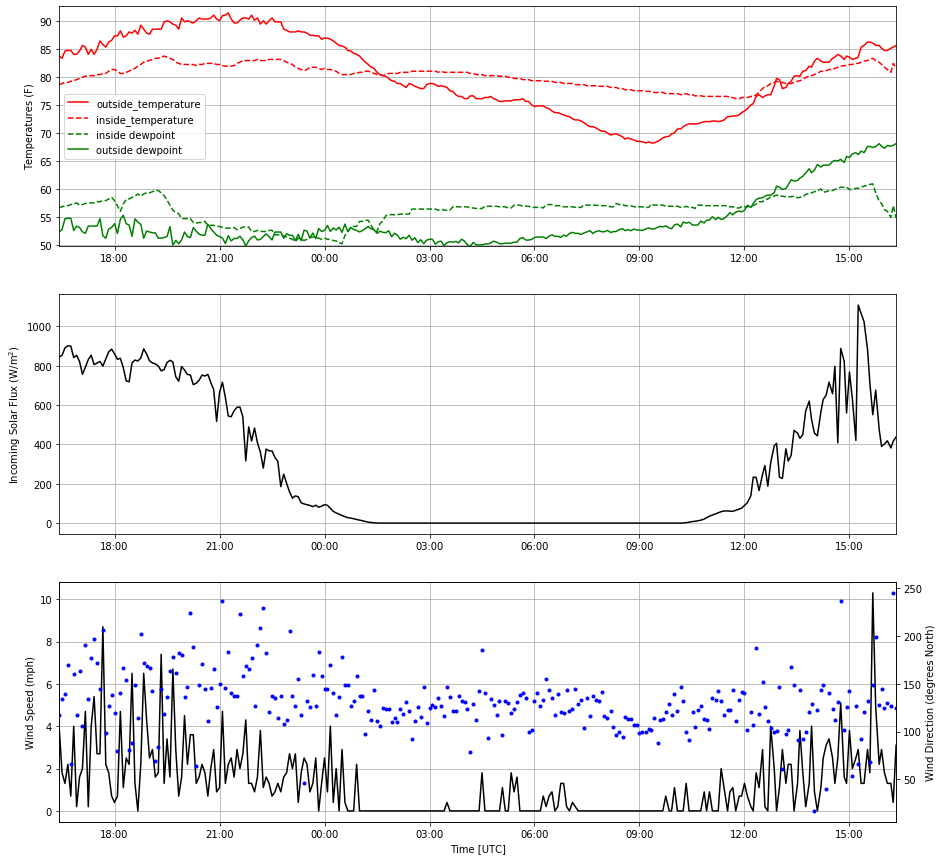

In [366]:
api = AmbientAPI()


xds3 = ingest_ambient_data(api)
my_disp = act.plotting.TimeSeriesDisplay(
    (xds3), figsize=(15, 15), subplot_shape=(3, ))
my_disp.plot('outside_temperature', marker=None, linestyle='-', color='red', 
             label = xds['outside_temperature'].attrs['long_name'], subplot_index=(0, ))
my_disp.plot('inside_temperature',  marker=None, linestyle='--', color='red', 
             label = xds['inside_temperature'].attrs['long_name'], subplot_index=(0, ))
my_disp.plot('inside_dewpoint',  marker=None, linestyle='--', color='green', 
             label = xds['inside_dewpoint'].attrs['long_name'], subplot_index=(0, ))
my_disp.plot('outside_dewpoint', marker=None, linestyle='-', color='green', label = xds['outside_dewpoint'].attrs['long_name'], 
            subplot_index=(0, ))

my_disp.day_night_background('Beer And Bike Barn Met Station')

my_disp.axes[0].grid()
my_disp.axes[0].legend()
my_disp.axes[1].grid()


my_disp.plot('downwelling_solar_radiation',  marker='None', linestyle='-', color='black', label = xds['outside_dewpoint'].attrs['long_name'], 
            subplot_index=(1, ))

my_disp.plot('wind_speed',  marker='None', linestyle='-', color='black', 
            subplot_index=(2, ))

my_disp.axes[2].grid()

my_disp.axes = np.append(my_disp.axes, plt.twinx())
my_disp.xrng = np.append(my_disp.xrng, np.expand_dims(my_disp.xrng[-1,:], axis=0) , axis=0)
my_disp.yrng = np.append(my_disp.yrng, np.expand_dims(my_disp.yrng[-1,:], axis=0) , axis=0)
my_disp.yrng[-1, 0] = 0
my_disp.yrng[-1, 1] = 360

my_disp.plot('wind_direction',  marker='.', color='blue', 
            subplot_index=(3, ))


my_disp.axes[0].set_title('')
my_disp.axes[1].set_title('')
my_disp.axes[2].set_title('')
my_disp.axes[3].set_title('')

my_disp.axes[0].set_ylabel('Temperatures (F)')
my_disp.axes[1].set_ylabel(r'Incoming Solar Flux (W/m$^2$)')
my_disp.axes[2].set_ylabel('Wind Speed (mph)')
my_disp.axes[3].set_ylabel('Wind Direction (degrees North)')
plt.savefig('/Users/scollis/foo.png')


In [368]:
# do today
xds = ingest_ambient_data(api)
a_day = np.timedelta64(1,'D')
n = 1
state = True
while state:
    try:
        xds = xds.merge(ingest_ambient_data(api, end_date = xds['time'].data.min()))
    except IndexError:
        state = False
    
    

<ipython-input-310-3274f87186bd>:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  dates = dates[ordd].astype('datetime64[ns]')
<ipython-input-310-3274f87186bd>:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  dates = dates[ordd].astype('datetime64[ns]')
<ipython-input-310-3274f87186bd>:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  dates = dates[ordd].astype('datetime64[ns]')
<ipython-input-310-3274f87186bd>:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  dates = dates[ordd].astype('datetime64[ns]')
<ipython-input-310-3274f87186bd>:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  dates = dates[ordd].astype('datetime64[ns]')
<ipython-input-310-3274f87186bd>:9: DeprecationWar

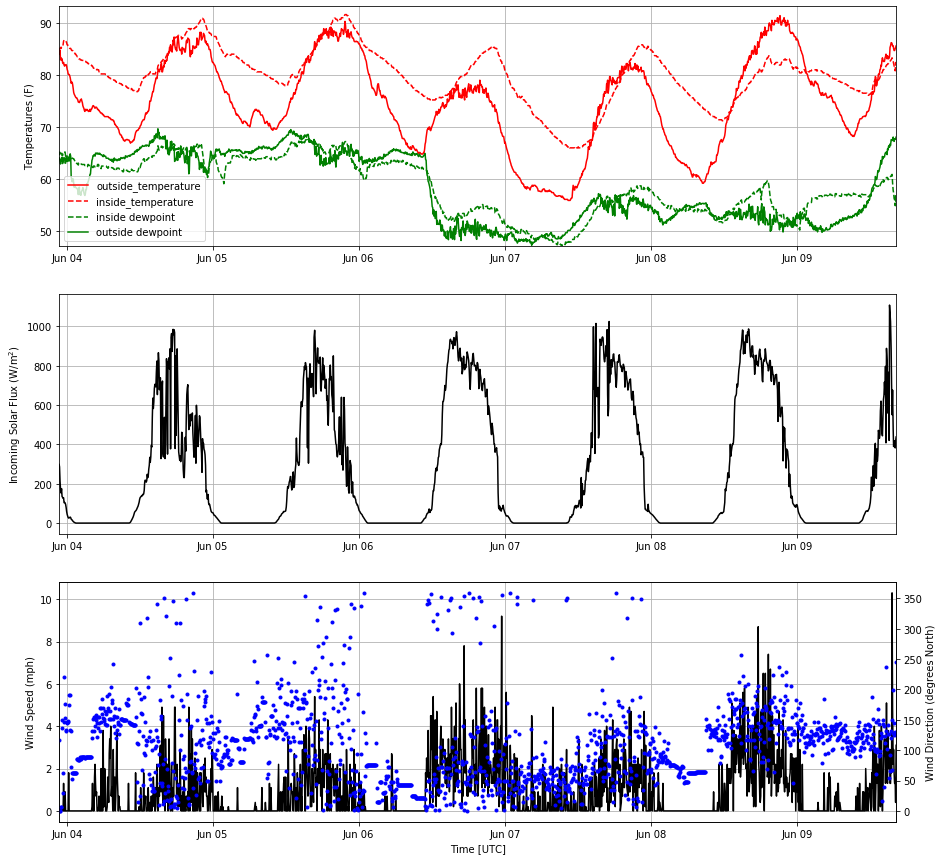

In [369]:
my_disp = act.plotting.TimeSeriesDisplay(
    (xds), figsize=(15, 15), subplot_shape=(3, ))
my_disp.plot('outside_temperature', marker=None, linestyle='-', color='red', 
             label = xds['outside_temperature'].attrs['long_name'], subplot_index=(0, ))
my_disp.plot('inside_temperature',  marker=None, linestyle='--', color='red', 
             label = xds['inside_temperature'].attrs['long_name'], subplot_index=(0, ))
my_disp.plot('inside_dewpoint',  marker=None, linestyle='--', color='green', 
             label = xds['inside_dewpoint'].attrs['long_name'], subplot_index=(0, ))
my_disp.plot('outside_dewpoint', marker=None, linestyle='-', color='green', label = xds['outside_dewpoint'].attrs['long_name'], 
            subplot_index=(0, ))

my_disp.day_night_background('Beer And Bike Barn Met Station')

my_disp.axes[0].grid()
my_disp.axes[0].legend()
my_disp.axes[1].grid()


my_disp.plot('downwelling_solar_radiation',  marker='None', linestyle='-', color='black', label = xds['outside_dewpoint'].attrs['long_name'], 
            subplot_index=(1, ))

my_disp.plot('wind_speed',  marker='None', linestyle='-', color='black', 
            subplot_index=(2, ))

my_disp.axes[2].grid()

my_disp.axes = np.append(my_disp.axes, plt.twinx())
my_disp.xrng = np.append(my_disp.xrng, np.expand_dims(my_disp.xrng[-1,:], axis=0) , axis=0)
my_disp.yrng = np.append(my_disp.yrng, np.expand_dims(my_disp.yrng[-1,:], axis=0) , axis=0)
my_disp.yrng[-1, 0] = 0
my_disp.yrng[-1, 1] = 360

my_disp.plot('wind_direction',  marker='.', color='blue', 
            subplot_index=(3, ))


my_disp.axes[0].set_title('')
my_disp.axes[1].set_title('')
my_disp.axes[2].set_title('')
my_disp.axes[3].set_title('')

my_disp.axes[0].set_ylabel('Temperatures (F)')
my_disp.axes[1].set_ylabel(r'Incoming Solar Flux (W/m$^2$)')
my_disp.axes[2].set_ylabel('Wind Speed (mph)')
my_disp.axes[3].set_ylabel('Wind Direction (degrees North)')
plt.savefig('/Users/scollis/foo.png')
